In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats 
data=pd.read_csv('..\\..\\dataPreprocessing\\k_movie_2.csv')
data


,MOVIE_NM,DRCTR_NM,MAKR_NM,DISTB_CMPNY_NM,OPN_DE,MOVIE_TY_NM,MOVIE_STLE_NM,NLTY_NM,TOT_SCRN_CO,VIEWNG_NMPR_CO,SEOUL_VIEWNG_NMPR_CO,GENRE_NM,GRAD_NM,MOVIE_SDIV_NM,CRITIC_RT,VIEWER_RT,YEAR,MONTH,DISTB_CMPNY_COUNT,SUCCESS
0,산상수훈,유영의,(주)그란,"['이언픽쳐스', '(주)그란']",20171207,개봉영화,장편,한국,71.0,284.0,284.0,드라마,전체관람가,독립/예술영화,3.00,6.30,2017,12,2,0.0
1,교회오빠,이호경,"KBS,커넥트픽쳐스(주)",['커넥트픽쳐스(주)'],20190516,개봉영화,장편,한국,200.0,154.0,154.0,다큐멘터리,전체관람가,독립/예술영화,5.59,9.31,2019,5,1,0.0
2,기생충,봉준호,(주)바른손이앤에이,['(주)씨제이이엔엠'],20190530,개봉영화,장편,한국,1948.0,227811.0,97354.0,드라마,15세이상관람가,일반영화,9.06,8.49,2019,5,1,1.0
3,이타미 준의 바다,정다운,기린그림,['(주)영화사 진진'],20190815,개봉영화,장편,한국,57.0,144.0,144.0,다큐멘터리,전체관람가,독립/예술영화,6.50,8.96,2019,8,1,0.0
4,벌새,김보라,에피파니(주),"['(주)엣나인필름', '(주)콘텐츠판다']",20190829,개봉영화,장편,한국,145.0,2721.0,2082.0,드라마,15세이상관람가,독립/예술영화,5.59,7.44,2019,8,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2차 송환,김동원,푸른영상,['(주)시네마달'],2022-09-,개봉영화,장편,한국,16.0,415.0,373.0,다큐멘터리,12세이상관람가,독립/예술영화,8.20,6.44,2022,9,1,0.0
354,EBS친구들 씽씽 댄스파티,감독명 누락,한국교육방송공사 EBS,['(주)에픽캔'],2022-09-,개봉영화,장편,한국,1.0,60.0,22.0,가족,전체관람가,일반영화,5.59,7.44,2022,9,1,0.0
355,당신의 이웃은 친절하지 않다,안드로,(주)빅픽처,['주식회사 씨엠닉스'],2022-09-,개봉영화,장편,한국,9.0,395.0,250.0,미스터리,15세이상관람가,독립/예술영화,5.59,7.47,2022,9,1,0.0
356,부적: 남의 운을 빼앗는 자,김세성,머지션스토어,['(주)트리플픽쳐스'],2022-09-,개봉영화,장편,한국,6.0,662.0,336.0,액션,12세이상관람가,독립/예술영화,5.59,8.84,2022,9,1,0.0


In [13]:
import matplotlib as mpl
print(mpl.matplotlib_fname())
print(mpl.get_cachedir())
mpl.rcParams['font.family']='NanumGothic'

c:\Users\gus10\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
C:\Users\gus10\.matplotlib


No handles with labels found to put in legend.


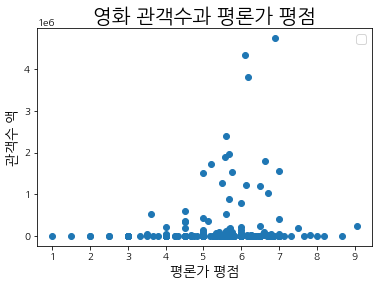

1.0
9.06


In [14]:
#네티즌 평점에 따른 관객수 변화 plot으로 나타내기
import matplotlib.pyplot as plt
criticViewer=data.dropna(subset=['VIEWNG_NMPR_CO', 'CRITIC_RT'])
fig, ax = plt.subplots()
ax.plot(criticViewer['CRITIC_RT'],
        criticViewer['VIEWNG_NMPR_CO'], 
        marker='o', 
        linestyle='')
ax.legend(fontsize=12, bbox_to_anchor=(1,1)) # legend position
plt.title('영화 관객수과 평론가 평점', fontsize=20)
plt.xlabel('평론가 평점', fontsize=14)
plt.ylabel('관객수 액', fontsize=14)
plt.show()

print(min(criticViewer['CRITIC_RT']))
print(max(criticViewer['CRITIC_RT']))



In [15]:
from scipy.stats import shapiro, levene
#정규분포인지 확인 - 둘다 비정규
print(shapiro(criticViewer['VIEWNG_NMPR_CO']))
print(shapiro(criticViewer['CRITIC_RT']))

#등분산성 - 등분산성을 따르지 않음
print(levene(criticViewer['VIEWNG_NMPR_CO'], criticViewer['CRITIC_RT'], center='median'))

ShapiroResult(statistic=0.24783772230148315, pvalue=1.4893745883518033e-35)
ShapiroResult(statistic=0.8935055732727051, pvalue=4.178933183518604e-15)
LeveneResult(statistic=19.603975337107304, pvalue=1.1018602226061454e-05)


In [16]:
#선형 관계가 있는 지 확인 : 연속-연속 비정규 : spearman - 선형관계가 있음 : -0.01(0과 매우 가깝..) 선형 관계 있다고 볼 수 있을까..?
print(stats.spearmanr(criticViewer['VIEWNG_NMPR_CO'],criticViewer['CRITIC_RT']))

SpearmanrResult(correlation=0.16341428100477706, pvalue=0.0019221293946475983)


In [17]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

fit = ols('VIEWNG_NMPR_CO ~ CRITIC_RT',data=criticViewer).fit() ## 단순선형회귀모형 적합

In [18]:
fit.summary()
#R제곱과 수정 R제곱 수치가 0.011 ~ 0.008로 나타났다. : 1%정도의 자료만 설명 가능

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         VIEWNG_NMPR_CO   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.926
Date:                Fri, 09 Dec 2022   Prob (F-statistic):             0.0483
Time:                        13:18:04   Log-Likelihood:                -5198.7
No. Observations:                 358   AIC:                         1.040e+04
Df Residuals:                     356   BIC:                         1.041e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.689e+05   1.46e+05     -1.157      0.248   -4.56e+05    1.18e+05
CRITIC_RT   5.162e+04   2.61e+04      1.981      0.048     383.491    1.03e+05
==============================================================================
Omnibus:                      461.933   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33459.304
Skew:                           6.266   Prob(JB):                         0.00
Kurtosis:                      48.673   Cond. No.                         32.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
## 변수의 선언
x = criticViewer['CRITIC_RT']
y = criticViewer['VIEWNG_NMPR_CO']

## 모델의 선언
criticViewer_linearRegression = LinearRegression()
 
## 모델-데이터셋의 학습 진행
criticViewer_linearRegression.fit(x.values.reshape(-1,1), y)
 
 
## 예측 실행
print( '평론가 평점 4점일때 관람 인원 예측 :{}'.format(criticViewer_linearRegression.predict([[4]])[0])
    , 'X변수 계수: {}'.format(criticViewer_linearRegression.coef_[0])
    , sep = '\n')

평론가 평점 4점일때 관람 인원 예측 :37564.57026764253
X변수 계수: 51615.39623134198


In [20]:
#기울기
print(criticViewer_linearRegression.coef_)

#절편
print(criticViewer_linearRegression.intercept_)

[51615.39623134]
-168897.0146577254


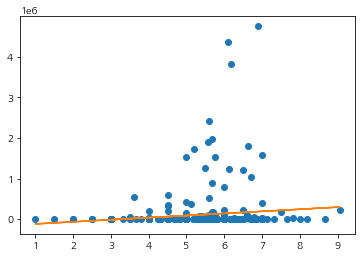

In [21]:
plt.plot(x, y, 'o')
plt.plot(x,criticViewer_linearRegression.predict(x.values.reshape(-1,1)))
plt.show()

In [22]:
data.isna().sum()

MOVIE_NM                0
DRCTR_NM                0
MAKR_NM                 0
DISTB_CMPNY_NM          0
OPN_DE                  0
MOVIE_TY_NM             0
MOVIE_STLE_NM           0
NLTY_NM                 0
TOT_SCRN_CO             0
VIEWNG_NMPR_CO          0
SEOUL_VIEWNG_NMPR_CO    0
GENRE_NM                0
GRAD_NM                 0
MOVIE_SDIV_NM           0
CRITIC_RT               0
VIEWER_RT               0
YEAR                    0
MONTH                   0
DISTB_CMPNY_COUNT       0
SUCCESS                 0
dtype: int64